In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pickle
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications

# dimensions of our images.
img_width, img_height = 150, 150

epochs = 100
batch_size = 8

def passar_vgg(x, y):
    model = applications.VGG16(include_top=False, weights='imagenet')
    bottleneck_features_train = model.predict(x)
    
    return (bottleneck_features_train, y)
  

def train_top_model():
#     train_data = np.load(open('./cChess/Weights/bottleneck_features_train.npy', "rb"))
#     train_labels = np.load(open('./cChess/Weights/bottleneck_labels.npy',"rb"))

    
    
    model = Sequential()
    
    model.add(Flatten(input_shape=(1, 1, 512)))

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    
    model.add(Dropout(0.5))

    model.add(Dense(12, activation='softmax'))


    model.compile(optimizer='adam',
                  loss='categorical_crossentropy', metrics=['accuracy'])

#     model.fit(train_data, train_labels,
#               epochs=epochs,
#               batch_size=batch_size,
#               validation_split=.2)
#     model.save_weights("./cChess/Weights/bottleneck512.h5")
    model.load_weights("Models/2805_570Blenders.h5")
    
    return model
#save_bottlebeck_features(x,y, x_test,y_test)
model = train_top_model()

In [2]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        'RandomBoard_TestSets/Blender Test Sets/Test Labels',  # this is the target directory
        target_size=(50, 50),  # all images will be resized to 150x150
        batch_size=64,
        class_mode='categorical')

Found 32 images belonging to 12 classes.


In [3]:
x_test, y_test = test_generator.next()

In [4]:
x_test.shape

(32, 50, 50, 3)

In [5]:
x_test[0]

array([[[0.57254905, 0.57254905, 0.57254905],
        [0.5803922 , 0.5803922 , 0.5803922 ],
        [0.5764706 , 0.5764706 , 0.5764706 ],
        ...,
        [0.6862745 , 0.6862745 , 0.6862745 ],
        [0.6901961 , 0.6901961 , 0.6901961 ],
        [0.7019608 , 0.7019608 , 0.7019608 ]],

       [[0.6431373 , 0.6431373 , 0.6431373 ],
        [0.6392157 , 0.6392157 , 0.6392157 ],
        [0.5294118 , 0.5294118 , 0.5294118 ],
        ...,
        [0.49803925, 0.49803925, 0.49803925],
        [0.48627454, 0.48627454, 0.48627454],
        [0.50980395, 0.50980395, 0.50980395]],

       [[0.6431373 , 0.6431373 , 0.6431373 ],
        [0.6392157 , 0.6392157 , 0.6392157 ],
        [0.5019608 , 0.5019608 , 0.5019608 ],
        ...,
        [0.5372549 , 0.5372549 , 0.5372549 ],
        [0.5058824 , 0.5058824 , 0.5058824 ],
        [0.5176471 , 0.5176471 , 0.5176471 ]],

       ...,

       [[0.8117648 , 0.8117648 , 0.8117648 ],
        [0.8000001 , 0.8000001 , 0.8000001 ],
        [0.5764706 , 0

In [6]:
y_test

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.,

In [7]:
p = passar_vgg(x_test, y_test)

In [8]:
model.predict(p[0])[0]

array([1.5123499e-06, 7.9102789e-13, 2.9496286e-19, 1.1514788e-27,
       2.1800068e-12, 1.1168799e-16, 7.9094821e-01, 6.8981655e-02,
       4.3196769e-13, 4.7489711e-21, 1.4006852e-01, 8.2781668e-08],
      dtype=float32)

In [9]:
model.evaluate(p[0], p[1])

32/32 [==============================] - 0s 10ms/step


[0.14901116490364075, 0.90625]

In [10]:
model.predict_classes(p[0])

array([ 6,  3,  5,  9,  9,  3,  0,  3,  8,  3,  3,  3,  4,  9,  1,  6,  3,
        9,  4,  9,  7,  9,  9,  9, 11, 11,  8,  2,  2,  3, 10,  5])

In [11]:
np.argmax(p[1], axis = 1)

array([ 6,  3,  5,  9,  9,  3,  0,  3,  8,  3,  3,  3,  4,  8,  1,  6,  3,
        9,  0,  9,  7,  9,  9,  9, 11, 11,  9,  2,  2,  3, 10,  5])

In [12]:
np.mean(np.equal(model.predict_classes(p[0]), np.argmax(p[1], axis = 1)))

0.90625

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

6


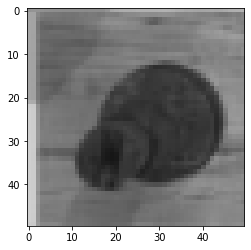

In [14]:
n = 0
print(np.argmax(p[1], axis = 1)[n])
plt.imshow(x_test[n])

[4.7554716e-37 0.0000000e+00 1.6036498e-08 1.0000000e+00 0.0000000e+00
 2.4890822e-24 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0036928e-28
 0.0000000e+00 0.0000000e+00]


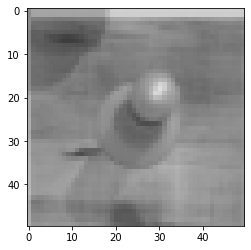

In [15]:
y_pred = model.predict(p[0])

plt.imshow(x_test[5])
print(y_pred[5])

In [16]:
y_pred_rafael_otario = np.argmax(y_pred, axis = 1)
y_test_rafael_otario = np.argmax(y_test, axis = 1)
y_test_rafael_otario

array([ 6,  3,  5,  9,  9,  3,  0,  3,  8,  3,  3,  3,  4,  8,  1,  6,  3,
        9,  0,  9,  7,  9,  9,  9, 11, 11,  9,  2,  2,  3, 10,  5])

In [17]:
y_pred_rafael_otario

array([ 6,  3,  5,  9,  9,  3,  0,  3,  8,  3,  3,  3,  4,  9,  1,  6,  3,
        9,  4,  9,  7,  9,  9,  9, 11, 11,  8,  2,  2,  3, 10,  5])

[ 0  1  2  3  4  5  6  7  8  9 10 11]
Confusion matrix, without normalization
[[1 0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 1 7 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 2]]


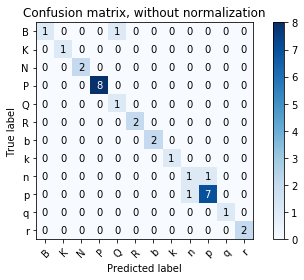

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    print(unique_labels(y_true, y_pred))
  
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)
class_names = ['B', 'K', 'N', 'P', 'Q', 'R', 'b', 'k', 'n', 'p', 'q', 'r']
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test_rafael_otario, y_pred_rafael_otario, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
# plot_confusion_matrix(y_test_rafael_otario, y_pred_rafael_otario, classes=class_names, normalize=True,
#                       title='Normalized confusion matrix')

plt.show()

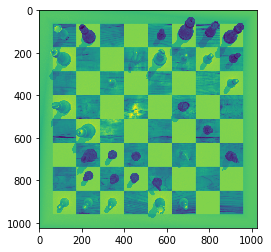

In [19]:
img = cv2.imread(f"RandomBoard_TestSets/Blender Test Sets/Boards/0.png", 0)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#cv2.circle(img, (29, 29), 20, 0, thickness = -1)
plt.imshow(img)

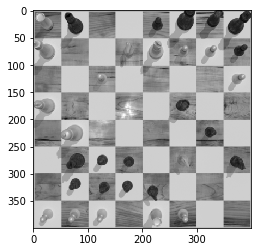

In [20]:
aux = np.zeros((400, 400), dtype = np.float32)
pts_aux = np.float32([[0,0],[aux.shape[1], 0],[aux.shape[1],aux.shape[0]],[0,aux.shape[0]]])
#pts_aux = np.float32([[int(0.1 * aux.shape[1]),int(0.1 * aux.shape[0])],[int(0.9*aux.shape[1]), int(0.1 * aux.shape[0])],[int(0.9*aux.shape[1]),int(0.9*aux.shape[0])],[int(0.1 * aux.shape[1]), int(0.9*aux.shape[0])]])
img_r = cv2.resize(img, (int(img.shape[1]/2), int(img.shape[0]/2)))


a, b = 29, 481
pts1 = np.array([[a, a], [b, a], [b, b], [a, b]], dtype = np.float32)

M = cv2.getPerspectiveTransform(pts1, pts_aux)
perspectiva = cv2.warpPerspective(img_r, M,(aux.shape[1], aux.shape[0]), aux, borderMode = cv2.BORDER_TRANSPARENT)
plt.imshow(perspectiva, cmap = "gray")

In [21]:
lst = []

for i in range(8):
    for j in range(8):
        lst.append(perspectiva[perspectiva.shape[1]*i//8:perspectiva.shape[1]*(i+1)//8, perspectiva.shape[0]*j//8:perspectiva.shape[0]*(j+1)//8])

array = np.array(lst).reshape(8, 8, 50,  -1)

In [22]:
def center_image(img, p = 0.35, boolean = True):
    if boolean == False:
        return img
    w, h = img.shape
    cw, ch = w//2, h//2
    #p = 0.4 #max 0.5
    return img[int(cw - w*p): int(cw + w*p), int(ch - h*p) : int(ch + h*p)]


def show_full_board(array_geral, center = False, p = 0.35):
    fig, axs = plt.subplots(8, 8, figsize = (10, 10))
    [axi.set_axis_off() for axi in axs.ravel()]
    for i in range(8):
        for j in range(8):
            axs[i, j].imshow(cv2.cvtColor(center_image(array_geral[i, j], boolean = center, p = p), cv2.COLOR_GRAY2RGB))
            #axs[i, j].imshow(get_squares(img_r, pts1, i, j, 35))
    return

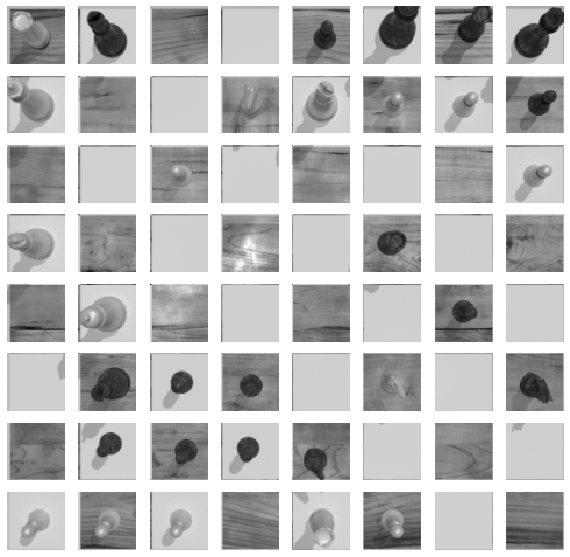

In [23]:
show_full_board(array)

In [24]:
conv= {
    0:"B",
    1:"K",
    2:"N",
    3:"P",
    4:"Q",
    5:"R",
    6:"b",
    7:"k",
    8:"n",
    9:"p",
    10:"q",
    11:"r",
    -1:"_"
    }

In [25]:
array.dtype

dtype('uint8')

In [26]:
array.shape

(8, 8, 50, 50)

In [27]:
aux = []
for i in range(8):
    for j in range(8):
        aux.append(cv2.cvtColor(array[i, j], cv2.COLOR_GRAY2RGB)/255)
aux = np.array(aux).reshape(64, 50, 50, 3)

In [28]:
aux.shape

(64, 50, 50, 3)

In [29]:
p = passar_vgg(aux, 0)
pr = model.predict_classes(p[0])

In [30]:
prediction_matrix = pr.reshape(8, 8)

Rede que classifica se tem peça ou não, esta parte está provisoriamente aqui

In [31]:
with open(f"RandomBoard_TestSets/Blender Test Sets/Dcs/0.pkl", "rb")as f:
    dc = pickle.load(f)

In [32]:
%%time
i = 0
for peca, pos in dc.items():
    if peca[0] == "_":
        square = array[pos[0], pos[1]]
        prediction_matrix[pos[0], pos[1]] = -1

CPU times: user 215 µs, sys: 19 µs, total: 234 µs
Wall time: 247 µs


In [33]:
prediction_matrix

array([[ 5,  6, -1, -1,  9,  7, 11, 10],
       [ 4, -1, -1,  2,  0,  3,  3,  8],
       [-1, -1,  3, -1, -1, -1, -1,  3],
       [ 4, -1, -1, -1, -1, 11, -1, -1],
       [-1,  1, -1, -1, -1, -1,  9, -1],
       [-1,  6,  9,  9, -1,  2, -1,  8],
       [-1,  9,  9,  9,  9, -1, -1, -1],
       [ 3,  3,  3, -1,  5,  3, -1, -1]])

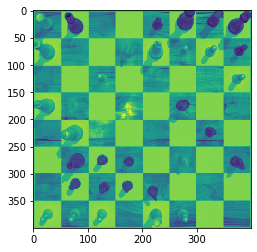

In [34]:
plt.imshow(perspectiva)

In [35]:
perspectiva

array([[182, 181, 182, ..., 169, 169, 169],
       [180, 181, 180, ..., 164, 168, 168],
       [180, 181, 172, ..., 127, 170, 170],
       ...,
       [192, 192, 196, ...,  97, 100, 168],
       [191, 192, 196, ..., 109, 114, 171],
       [191, 191, 192, ..., 170, 170, 180]], dtype=uint8)

R


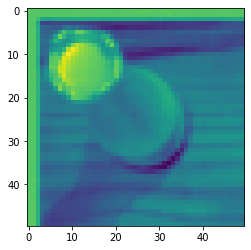

In [36]:
plt.imshow(array[0, 0])
print(conv[prediction_matrix[0, 0]])

R


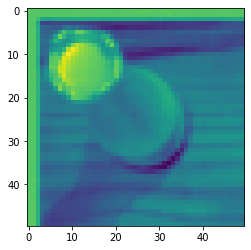

****************************************
b


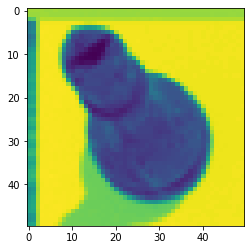

****************************************
p


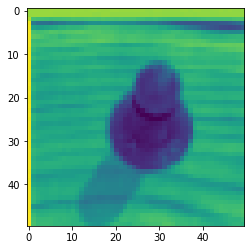

****************************************
k


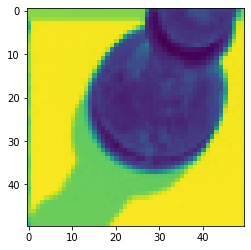

****************************************
r


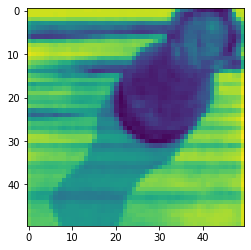

****************************************
q


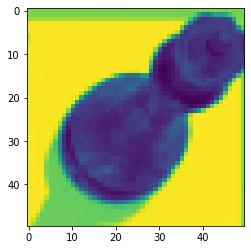

****************************************
Q


In [ ]:
for i in range(8):
    for j in range(8):
        classification = conv[prediction_matrix[i, j]]
        if classification != "_":
            print(classification)
            plt.imshow(array[i, j])
            plt.show()
            print("*" * 40)

In [ ]:
def get_pos(i, j):
    origem = np.array(pts1[0])
    tr = np.array(pts1[1])
    bl = np.array(pts1[3])
    br = np.array(pts1[2])

    centro = (origem + ((tr - origem) * i // 8) + ((bl - origem) * j // 8) + ((br - origem) // 16)).astype(int)
    return tuple(centro)

In [ ]:
img = cv2.imread(f"RandomBoard_TestSets/Blender Test Sets/Boards/0.png", 0)
img_r = cv2.resize(img, (int(img.shape[1]/2), int(img.shape[0]/2)))
plt.imshow(cv2.circle(img_r, get_pos(6, 4), 10, 255, thickness = -1))

In [ ]:
img_ = cv2.cvtColor(img_r, cv2.COLOR_GRAY2BGR).copy()